[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/multiclass-classification/ANN.ipynb)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# **Without Using Library**

## Data Preprocessing

In [ ]:
!wget https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/dataset/dataset_NN.csv

In [ ]:
df = pd.read_csv('dataset_NN.csv')
df
df.shape

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1
...,...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889,10
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754,10
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222,10
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320,10


(2000, 7)

In [ ]:
#normalizing the dataset
col_names = np.array(df.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
df

,att1,att2,att3,att4,att5,att6,class
0,0.763401,-1.518350,-1.019892,-0.930581,-1.125782,-1.207172,1
1,0.763401,-1.518350,-1.019892,-1.187582,-1.156505,-1.210070,1
2,0.763401,-1.518350,-1.019892,-1.009649,-1.100586,-1.220813,1
3,0.763401,-1.518350,-1.019892,-1.077439,-1.265922,-1.187252,1
4,0.763401,-1.518350,-1.019892,-1.166066,-1.064171,-1.199853,1
...,...,...,...,...,...,...,...
1995,0.763401,-0.642463,0.409529,0.043193,0.055709,-0.220719,10
1996,0.763401,-0.642463,0.409529,-0.160537,-0.066005,-0.242749,10
1997,0.763401,-0.642463,0.409529,-0.869710,-0.335052,-0.635782,10
1998,0.763401,-0.642463,0.409529,-0.539600,-0.731993,-0.542198,10


In [ ]:
df_shuffle = df.sample(frac=1)
df_shuffle

,att1,att2,att3,att4,att5,att6,class
200,-0.740837,0.233424,-1.019892,-0.808839,-0.643568,-0.750950,2
568,-0.740837,0.233424,-1.019892,1.897154,1.849457,1.775770,3
818,-0.740837,1.109311,0.409529,-0.142060,0.534478,0.126658,5
1478,-0.740837,0.233424,-1.019892,0.190690,0.825370,0.089207,8
512,-0.740837,0.233424,-1.019892,0.775162,0.895542,0.629324,3
...,...,...,...,...,...,...,...
116,0.763401,-1.518350,-1.019892,-1.238855,-1.172059,-1.214825,1
951,-0.740837,0.233424,-1.019892,-0.125502,0.229936,0.374070,5
229,-0.740837,0.233424,-1.019892,-0.960337,-1.230692,-0.912245,2
1464,-0.740837,0.233424,-1.019892,-0.267401,-0.059727,-0.408187,8


In [ ]:
df_train = df_shuffle.iloc[:math.floor(0.7*df.shape[0])]
df_test = df_shuffle.iloc[math.ceil(0.7*df.shape[0]):]
x_train = np.array(df_train.iloc[:,:-1])
y_train = np.array(df_train.iloc[:,-1])
x_test = np.array(df_test.iloc[:,:-1])
y_test = np.array(df_test.iloc[:,-1])

## Single Hidden Layer Artificial Neural Network

In [ ]:
def sigmoid(Z):
  return 1/(1+np.exp(-1*Z))

In [ ]:
def sigmoid_derivative(Z):
  return sigmoid(Z)*(1-sigmoid(Z))

In [ ]:
def stochastic_gradient_descent(X,Y,learning_rate=0.1,no_of_iterations=10000,hidden_units = 8):
  #Y = Y.reshape(len(Y))
  y_actual =Y

  #one hot encoding Y - converting univariate multiclass classification into multiple binary class classification problem
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y]=1
  Y = one_hot_Y[:,1:]

  #random weight initialization
  W1 = np.random.randn(hidden_units,6) # 8 cause considering 8 hidden units and 6 cause 6 input units
  b1 = np.random.randn(1,hidden_units)
  W = np.random.randn(10,hidden_units) # 10 cause we have 10 output units
  b = np.random.randn(1,10)

  error_every_50_iteration_list = list()
  accuracy_every_50_iteration_list = list()

  for i in range(no_of_iterations):

    #generating a random point
    Xp = list()
    Yp = list()
    random_no = random.randint(0,X.shape[0]-1)
    Xp.append(X[random_no])
    Yp.append(Y[random_no])
    #converting list into numpy array cause numpy is very fast
    Xp = np.array(Xp) #1x6
    Yp = np.array(Yp) #1x10

    #--------------------------------forward propagation-----------------------------
    Z1 = Xp.dot(W1.T) + b1 #1xhidden_units
    A1 = sigmoid(Z1) #1xhidden_units
    Z2 = A1.dot(W.T) + b #1x10
    A2 = sigmoid(Z2) #1x10

    #--------------------------------backward propagation - calculating derivaties-----------------------------
    db = (-1)*(Yp/A2)*(sigmoid_derivative(Z2)) + ((1-Yp)/(1-A2))*(sigmoid_derivative(Z2)) #1X10
    dW = db.T.dot(A1)#10X8 = 10X1 X 1X8
    db1 = (db.dot(W))*sigmoid_derivative(Z1)#1X8 = (1X10 X 10X8) X 1X8
    dW1 = (db1.T).dot(Xp)# 8X6 = 8X1 X 1X6

    #--------------------------------weight update rule-------------------------------
    W = W - (learning_rate)*(dW)
    b = b - (learning_rate)*(db)
    W1 = W1 - (learning_rate)*(dW1)
    b1 = b1 - (learning_rate)*(db1)

    #----------------- storing error and accuracy every 50 interval--------------------
    #calculating error
    error = (-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))

    #calculating accuracy
    pred_one_hot_Y = sigmoid(((sigmoid((X.dot(W1.T)) + b1)).dot(W.T)) + b)
    y_pred = list()
    for row in range(pred_one_hot_Y.shape[0]):
      threshold=0
      highest_column = 0
      for column in range(pred_one_hot_Y.shape[1]):
        if(pred_one_hot_Y[row][column] > threshold):
          threshold = pred_one_hot_Y[row][column]
          highest_column = column
      y_pred.append(highest_column + 1)
    correctly_classified = 0
    for k in range(len(y_actual)):
      if y_actual[k] == y_pred[k]:
        correctly_classified = correctly_classified + 1
    accuracy = correctly_classified / len(y_actual)

    if(i%50 == 0):
      error_every_50_iteration_list.append(error)
      accuracy_every_50_iteration_list.append(accuracy)

  return W1,b1,W,b,error_every_50_iteration_list,accuracy_every_50_iteration_list,y_pred


### Learning Rate = 0.1



In [ ]:
  W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.1,10000,10)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer Weights : {} ".format(list(W1)))
  print("Hidden Layer Bias : {} ".format(list(b1)))

Output Layer Weights : [array([-1.21281437,  2.20891493,  2.16887408,  1.41684658,  1.51879365,
       -6.57122658, -1.92723049, -5.98167225,  0.93382037, -0.75435524]), array([-0.6864194 , -3.52961733,  5.64423488, -2.40730945, -2.69812653,
       -4.44790271, -2.04952782,  2.93233796, -1.38411476,  0.19725151]), array([-3.02701341,  0.48431061, -2.01312185, -1.82420802, -3.04361097,
       -1.10807721,  2.18401657, -2.7984213 ,  1.98848818,  0.55635528]), array([-1.2715677 , -2.30025013, -2.88866135, -1.09594512, -2.21408119,
       -1.20118241,  1.52401611,  1.91105067, -0.51259734,  2.23155642]), array([-1.63791837, -1.8333007 , -2.86887244, -0.27601699, -1.66441943,
        1.23735258, -2.38983902,  2.99060082, -1.53416535, -2.65850889]), array([ 2.43998507, -2.21572686, -2.00034439, -3.55777672, -0.76496775,
       -0.66577898,  1.09195448,  0.32783376,  3.63466128, -2.76563889]), array([-2.0016378 ,  0.60710536,  0.89654566, -3.03852137,  2.1589008 ,
        3.66985721, -2.12757

Error Every 50 Iterations : [19.61086635  2.82761259  2.49473727  3.5484316   2.13410036  3.76102019
  2.95535375  2.59952373  1.80453929  1.53006165  1.85382467  2.50908897
  1.59737604  1.74869431  3.03704872  2.88837314  1.12124676  1.76259012
  1.29445373  3.36800177  2.44642377  0.7660967   0.90338384  3.3145371
  1.55214113  1.10390657  1.09481238  2.20931861  1.24469107  0.88815479
  2.52381627  0.55925307  1.14644337  1.06272941  1.37516801  0.55102522
  1.65568531  1.3968402   2.86909533  2.91126463  2.73409079  0.22093594
  2.01894145  3.53678798  1.08923597  0.35658258  0.67949843  0.21421767
  0.19558361  2.14643075  2.17232274  0.53991062  0.40137145  1.94026714
  1.82397289  1.48928138  6.70361806  1.23930816  0.76980195  3.91223522
  0.25444757  4.17574993  0.22173442  1.19581111  1.36058306  0.22901955
  0.48469984  3.9624415   4.07424641  0.86194394  0.2415166   4.23443824
  1.51265778  0.29763799  4.16353305  1.63347519  1.91681242  0.21864797
  0.78560912  1.02867765

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

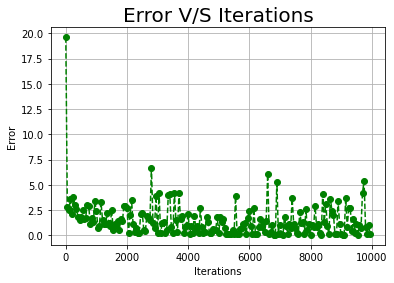

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.01714286 0.39285714 0.37142857 0.40285714 0.58142857 0.55857143
 0.37571429 0.48071429 0.48357143 0.60714286 0.62214286 0.61357143
 0.64214286 0.67428571 0.67714286 0.67       0.68785714 0.61714286
 0.67642857 0.64285714 0.66428571 0.69357143 0.62928571 0.66714286
 0.66285714 0.67428571 0.64785714 0.67214286 0.69285714 0.65857143
 0.67928571 0.69214286 0.67571429 0.69857143 0.68928571 0.69571429
 0.69571429 0.66785714 0.67928571 0.69642857 0.69357143 0.69571429
 0.69285714 0.69857143 0.70285714 0.655      0.68785714 0.67785714
 0.68428571 0.68785714 0.69857143 0.685      0.69642857 0.68357143
 0.69214286 0.69714286 0.69714286 0.64285714 0.68428571 0.69785714
 0.69071429 0.66642857 0.69       0.70571429 0.68857143 0.69357143
 0.69285714 0.67214286 0.68571429 0.70071429 0.70285714 0.695
 0.70357143 0.70714286 0.70785714 0.64714286 0.69928571 0.69214286
 0.69571429 0.69214286 0.69785714 0.69714286 0.69428571 0.69857143
 0.71       0.71       0.70071429 0.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

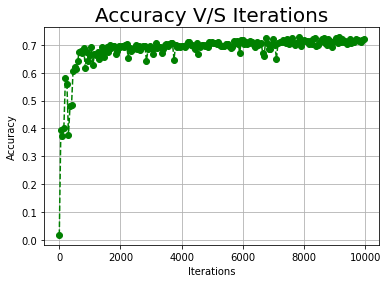

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xhidden_units
A1 = sigmoid(Z1) #1xhidden_units
Z2 = A1.dot(W.T) + b #1x10
A2 = sigmoid(Z2) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid(((sigmoid((x_test.dot(W1.T)) + b1)).dot(W.T)) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 0.1377318245810628
Accuracy After completing training : 0.7207142857142858

Loss After completing testing : [[0.03492099]]
Accuracy After completing testing : 0.7183333333333334


### Learning Rate = 0.01



In [ ]:
  W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.01,10000,10)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer Weights : {} ".format(list(W1)))
  print("Hidden Layer Bias : {} ".format(list(b1)))

Output Layer Weights : [array([ 2.31153886,  0.49310337, -0.22571002, -2.2996077 ,  1.4516081 ,
       -1.03884986, -1.91621394,  0.28933693, -2.05128208,  1.87925972]), array([-1.94399385, -1.13817558,  0.945732  , -0.21542147,  0.73920199,
       -2.75474056,  0.96923585, -0.07839966, -1.90797629, -0.69472054]), array([-0.89566809, -0.93221162,  0.51079614, -1.24067787,  1.32410196,
        0.65150819, -1.33751785, -0.58568716,  1.1462318 , -0.95167087]), array([-1.16947276, -1.74259991, -2.19283503, -0.48349185, -1.34762288,
        0.32024715, -0.05215652, -2.37742963, -0.27334331, -0.95161744]), array([-0.87898138,  0.2569652 , -0.19697821, -2.10712274, -2.23104707,
        2.12148673,  0.45890836, -0.8488619 , -2.77627058,  0.04415982]), array([-0.63154909, -0.42596711, -0.50637689,  0.10433985, -1.57487036,
       -0.30281218, -2.72678357,  0.45142601,  0.95297505, -2.67856527]), array([-1.21608359,  2.96391306, -0.21548536,  2.74863954, -0.11136332,
       -0.88477001, -2.26052

Error Every 50 Iterations : [12.2298847   3.41287095  6.80633922  3.56596437  3.53288528  3.36181112
  2.99770869  3.46000359  3.60954731  3.15621392  3.21165255  3.402571
  2.58717657  3.12843523  3.30692491  3.87050085  2.49857227  2.2852792
  2.2222738   2.10633584  2.12405202  3.21860461  1.9416453   2.7918596
  2.59851917  3.58493469  2.9865651   2.26477892  1.82424491  3.39439434
  2.67950422  1.81256688  2.46214063  4.30628677  3.13748862  2.04026952
  1.89646679  1.91895057  1.81978389  2.44353342  2.6211735   1.96516713
  2.14833514  3.04785588  2.13297824  2.30799583  2.34558386  2.55843263
  3.59589398  3.09148675  2.80902898  1.60394218  2.49428783  1.87534784
  2.29219741  2.75874101  2.14690313  2.34476716  1.95068065  1.4086943
  1.96504552  2.02412634  1.87609743  1.31277378  3.12529966  1.2842329
  2.17149093  2.18096788  1.43644457  2.11977757  3.11408352  2.27550746
  2.27715393  2.22302614  2.18078848  2.02279126  4.45701576  1.9867601
  1.98927963  1.17798424  2.16

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

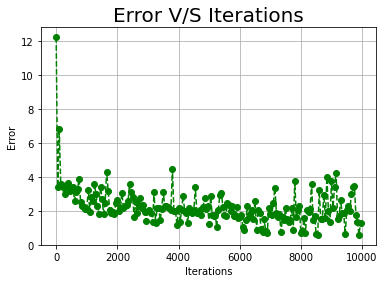

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.07428571 0.05928571 0.03428571 0.02928571 0.02       0.03785714
 0.06       0.07857143 0.16642857 0.22857143 0.28642857 0.27714286
 0.31357143 0.31928571 0.31357143 0.34357143 0.34714286 0.41
 0.44285714 0.43571429 0.40142857 0.32285714 0.29857143 0.32642857
 0.31142857 0.34285714 0.41714286 0.41785714 0.42857143 0.41857143
 0.42785714 0.45928571 0.435      0.41571429 0.44642857 0.46428571
 0.44857143 0.435      0.44357143 0.44428571 0.43071429 0.43142857
 0.45       0.47714286 0.47928571 0.51214286 0.48428571 0.49357143
 0.49357143 0.48928571 0.49       0.5        0.51428571 0.52
 0.53214286 0.54714286 0.55785714 0.55857143 0.58642857 0.60071429
 0.56571429 0.58       0.54857143 0.51928571 0.53714286 0.55928571
 0.54285714 0.56928571 0.57857143 0.57928571 0.57214286 0.57785714
 0.55       0.59071429 0.625      0.63       0.66714286 0.67571429
 0.67428571 0.68714286 0.68214286 0.67142857 0.64642857 0.64642857
 0.66357143 0.65       0.64714286 0.6571428

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

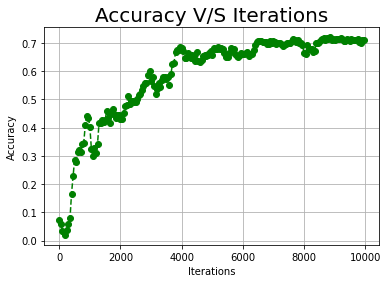

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xhidden_units
A1 = sigmoid(Z1) #1xhidden_units
Z2 = A1.dot(W.T) + b #1x10
A2 = sigmoid(Z2) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid(((sigmoid((x_test.dot(W1.T)) + b1)).dot(W.T)) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 1.2933189998307704
Accuracy After completing training : 0.7114285714285714

Loss After completing testing : [[2.02511039]]
Accuracy After completing testing : 0.6783333333333333


### Learning Rate = 0.001

In [ ]:
  W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.001,15000,10)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer Weights : {} ".format(list(W1)))
  print("Hidden Layer Bias : {} ".format(list(b1)))

Output Layer Weights : [array([-1.46807365, -0.92213861,  0.02377168, -0.23043191, -1.09089257,
       -2.23190441, -0.69374665,  1.06348353,  0.19060366, -0.04875292]), array([-1.01034833, -1.43347475, -0.58260068, -0.60867112, -0.75983568,
       -0.00915626, -0.61143613,  0.30249679,  0.88010822, -0.12357449]), array([-1.38477514, -0.7419025 , -0.72178463, -0.96166207, -0.70701738,
        0.15631464, -0.96911853, -0.01856195,  0.52276967,  0.03031513]), array([ 1.61532695, -1.43507112, -0.34717938, -0.90125303,  0.7664109 ,
        0.68214344, -1.94176319, -2.15167951,  1.15981147, -0.01498425]), array([-1.5078137 , -1.16841728,  0.57698686,  0.0961504 ,  0.75727578,
       -1.19206597, -0.29687757, -0.41932429,  0.76883867,  1.99264657]), array([-0.70508033,  0.62809124, -0.14865896, -2.55720108, -1.10943013,
        0.2665608 ,  1.27220009, -0.99380576, -0.71812332,  0.13605053]), array([-0.57995018, -1.31458505, -0.33347187, -0.06647626,  1.2568048 ,
       -0.90501874,  0.23871

Error Every 50 Iterations : [13.25398305 13.44637373 11.4942639   9.23614924 10.11189226  6.67939662
  9.76529624  9.95422093  9.51836962  6.76098266  5.61990504  5.73424336
  7.31354139  5.05257697  7.15322422  8.20708318  5.55774598  7.79496591
  5.89493049  3.80818788  4.03438133  5.80740356  5.90286207  3.7582177
  4.26743856  4.94767635  5.2937902   3.40595491  4.46900554  4.7314163
  4.96858551  4.70116555  4.20165601  3.43095251  4.12765181  4.65162852
  4.77142116  3.36633188  3.09403489  4.31905886  4.54956091  4.06248112
  2.99087853  4.22647127  3.828341    4.05738353  2.96702596  3.17840899
  2.95836512  3.42288438  3.18492469  3.19859738  2.98822601  3.7654382
  3.01062994  3.11360717  3.2765464   2.82885781  3.58587319  3.87959425
  2.89913457  3.2357844   3.54500886  2.78950609  3.13357195  3.76185022
  3.61437377  3.51284175  3.07721998  2.81146388  3.31182714  3.06881878
  3.6994897   3.7852066   3.28713285  2.72152997  3.6336063   3.24542852
  2.92814999  3.51031467  

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

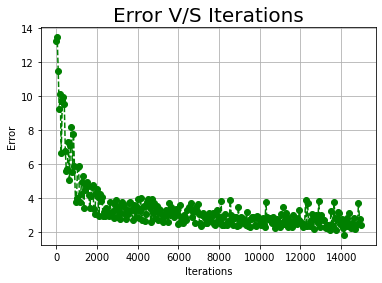

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.19285714 0.19285714 0.19285714 0.19285714 0.19285714 0.19357143
 0.19285714 0.19285714 0.19285714 0.19071429 0.17142857 0.15571429
 0.14428571 0.125      0.12       0.11714286 0.11428571 0.11214286
 0.09928571 0.09428571 0.09       0.08214286 0.06785714 0.06071429
 0.06928571 0.07642857 0.08214286 0.09214286 0.10357143 0.10214286
 0.10785714 0.11285714 0.10785714 0.11357143 0.10642857 0.11071429
 0.11714286 0.10928571 0.10357143 0.10857143 0.11071429 0.11642857
 0.10785714 0.12714286 0.12       0.11857143 0.12214286 0.12071429
 0.12357143 0.13       0.14857143 0.14142857 0.15214286 0.15428571
 0.16071429 0.16714286 0.165      0.16428571 0.16571429 0.17285714
 0.19142857 0.19928571 0.20785714 0.20285714 0.20928571 0.21214286
 0.215      0.21428571 0.215      0.21       0.20285714 0.20714286
 0.21857143 0.22       0.21857143 0.21571429 0.19357143 0.19357143
 0.16928571 0.165      0.17071429 0.17428571 0.14428571 0.13785714
 0.13       0.13       0.133571

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

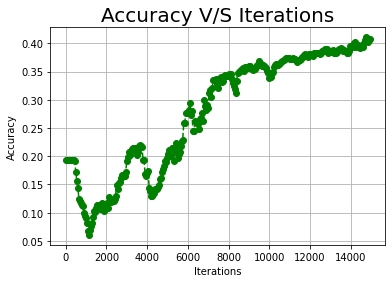

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xhidden_units
A1 = sigmoid(Z1) #1xhidden_units
Z2 = A1.dot(W.T) + b #1x10
A2 = sigmoid(Z2) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid(((sigmoid((x_test.dot(W1.T)) + b1)).dot(W.T)) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 2.4084890816097233
Accuracy After completing training : 0.40714285714285714

Loss After completing testing : [[2.61615416]]
Accuracy After completing testing : 0.42


## Two Hidden Layer Artificial Neural Network


In [ ]:
def sigmoid(Z):
  return 1/(1+np.exp(-1*Z))

In [ ]:
def sigmoid_derivative(Z):
  return sigmoid(Z)*(1-sigmoid(Z))

In [ ]:
def stochastic_gradient_descent(X,Y,learning_rate=0.1,no_of_iterations=10000,layer1_hidden_units = 8,layer2_hidden_units = 8):
  #Y = Y.reshape(len(Y))
  y_actual =Y

  #one hot encoding Y - converting univariate multiclass classification into multiple binary class classification problem
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y]=1
  Y = one_hot_Y[:,1:]

  #random weight initialization
  W1 = np.random.randn(layer1_hidden_units,6) #6 cause 6 input units
  b1 = np.random.randn(1,layer1_hidden_units)
  W2 = np.random.randn(layer2_hidden_units,layer1_hidden_units)
  b2 = np.random.randn(1,layer2_hidden_units)
  W = np.random.randn(10,layer2_hidden_units) # 10 cause we have 10 output units
  b = np.random.randn(1,10)

  error_every_50_iteration_list = list()
  accuracy_every_50_iteration_list = list()

  for i in range(no_of_iterations):

    #generating a random point
    Xp = list()
    Yp = list()
    random_no = random.randint(0,X.shape[0]-1)
    Xp.append(X[random_no])
    Yp.append(Y[random_no])
    #converting list into numpy array cause numpy is very fast
    Xp = np.array(Xp) #1x6
    Yp = np.array(Yp) #1x10

    #--------------------------------forward propagation-----------------------------
    Z1 = Xp.dot(W1.T) + b1 #1xlayer1_hidden_units
    A1 = sigmoid(Z1) #1xlayer1_hidden_units
    Z2 = A1.dot(W2.T) + b2 #1Xlayer2_hidden_units
    A2 = sigmoid(Z2)
    Z3 = A2.dot(W.T) + b #1x10
    A3 = sigmoid(Z3) #1x10

    #--------------------------------backward propagation - calculating derivaties-----------------------------
    db = (-1)*(Yp/A3)*(sigmoid_derivative(Z3)) + ((1-Yp)/(1-A3))*(sigmoid_derivative(Z3)) #1X10
    dW = (db.T).dot(A2)#10X8 = 10X1 X 1X8
    db2 = (db.dot(W))*sigmoid_derivative(Z2)
    dW2 = (db2.T).dot(A1)
    db1 = (db2.dot(W2))*sigmoid_derivative(Z1)#1X8 = (1X10 X 10X8) X 1X8
    dW1 = (db1.T).dot(Xp)# 8X6 = 8X1 X 1X6

    #--------------------------------weight update rule-------------------------------
    W = W - (learning_rate)*(dW)
    b = b - (learning_rate)*(db)
    W2 = W2 - (learning_rate)*(dW2)
    b2 = b2 - (learning_rate)*(db2)
    W1 = W1 - (learning_rate)*(dW1)
    b1 = b1 - (learning_rate)*(db1)

    #----------------- storing error and accuracy every 50 interval--------------------
    #calculating error
    error = (-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))

    #calculating accuracy
    pred_one_hot_Y = sigmoid((sigmoid((sigmoid(X.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
    y_pred = list()
    for row in range(pred_one_hot_Y.shape[0]):
      threshold=0
      highest_column = 0
      for column in range(pred_one_hot_Y.shape[1]):
        if(pred_one_hot_Y[row][column] > threshold):
          threshold = pred_one_hot_Y[row][column]
          highest_column = column
      y_pred.append(highest_column + 1)
    correctly_classified = 0
    for k in range(len(y_actual)):
      if y_actual[k] == y_pred[k]:
        correctly_classified = correctly_classified + 1
    accuracy = correctly_classified / len(y_actual)

    if(i%50 == 0):
      error_every_50_iteration_list.append(error)
      accuracy_every_50_iteration_list.append(accuracy)

  return W2,b2,W1,b1,W,b,error_every_50_iteration_list,accuracy_every_50_iteration_list,y_pred


### Learning Rate = 0.1

In [ ]:
  W2,b2,W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.1,10000,8,8)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer2 Weights : {} ".format(list(W2)))
  print("Hidden Layer2 Bias : {} ".format(list(b2)))
  print("Hidden Layer1 Weights : {} ".format(list(W1)))
  print("Hidden Layer1 Bias : {} ".format(list(b1)))

Output Layer Weights : [array([-5.87272954, -2.05681871, -0.28578846, -5.89555529,  0.23293002,
        2.34120858,  3.9222716 ,  1.54939799]), array([-2.45310131, -0.66796763,  4.06979427, -1.869186  , -5.75871096,
        3.6979452 , -3.72839522, -4.08050765]), array([ 0.20550528, -1.98680034, -4.09064181, -2.13134148,  1.62773691,
       -2.03161899, -0.95091344,  3.7054459 ]), array([ 1.03700085, -0.0252362 , -3.35295828,  1.50615068, -2.84245361,
       -2.20174607, -1.72953016,  0.48723841]), array([ 1.66784954, -1.55067606, -1.84886987, -3.62248422, -4.641459  ,
       -3.39169221,  0.11469735, -3.10154601]), array([ 0.31917732, -1.9072002 , -2.47102063,  2.23792292,  2.44094516,
       -3.98255009, -2.97960148, -1.1579214 ]), array([-1.27896806, -4.51153203,  3.08573169,  2.76884212, -0.61857517,
       -1.02224095,  0.91183366, -2.45393827]), array([-2.52664444,  0.63751832,  3.10216634, -2.4283642 , -3.94690117,
       -4.16523805, -2.1891923 ,  3.26361915]), array([-2.801075

Error Every 50 Iterations : [11.81041066  2.99210621  3.24675914  2.80446669  3.64201747  2.38873703
  3.57039443  1.64656071  2.7989256   1.7531466   1.43922242  3.89543862
  1.97055984  3.49015884  1.14558759  2.13370046  2.34852421  2.30006694
  2.66500189  2.20437359  1.79752468  1.63616298  1.35223267  2.70456231
  2.73655629  2.00754745  1.13112082  2.37461873  2.18458891  1.29094581
  2.99096429  1.69562427  0.7030424   1.43712034  1.74582147  1.04438001
  1.50391586  0.33410792  1.09570639  1.19372522  0.79098172  1.7912878
  1.34290025  2.18698261  1.42185833  1.26875753  1.00207777  2.18661144
  2.24182503  1.47033188  1.57723773  2.12270178  1.6684875   1.10238148
  3.64665933  3.26163336  1.00919734  1.11779654  1.49257882  0.94039584
  1.28133808  1.58261345  0.5797829   1.40295576  0.12969409  0.74267119
  0.68605751  3.27016818  1.3022698   0.45208793  0.27315176  1.75385121
  0.67661763  0.1204952   1.75590869  0.48234787  0.10133211  0.92277991
  4.30640275  3.52624429

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

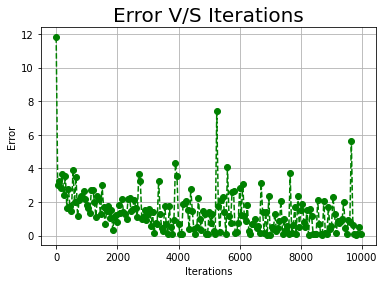

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.09785714 0.17142857 0.22071429 0.24857143 0.34214286 0.20857143
 0.25642857 0.33571429 0.395      0.43857143 0.40428571 0.36428571
 0.49071429 0.45071429 0.46428571 0.52642857 0.49857143 0.46571429
 0.515      0.58142857 0.59571429 0.47214286 0.53714286 0.57071429
 0.54142857 0.60857143 0.53428571 0.59571429 0.56142857 0.6
 0.62571429 0.58       0.57214286 0.65714286 0.63428571 0.65
 0.64       0.68571429 0.65214286 0.64642857 0.67571429 0.66285714
 0.64714286 0.64642857 0.68285714 0.69071429 0.69928571 0.69571429
 0.64357143 0.66285714 0.67       0.64785714 0.68714286 0.64214286
 0.68       0.70214286 0.70857143 0.70714286 0.69       0.68214286
 0.70142857 0.70428571 0.70214286 0.64642857 0.69857143 0.68285714
 0.69785714 0.70142857 0.69571429 0.69357143 0.72       0.69571429
 0.685      0.67071429 0.71571429 0.73214286 0.70071429 0.68571429
 0.70857143 0.70071429 0.70214286 0.70571429 0.71285714 0.70857143
 0.66142857 0.64785714 0.71428571 0.69428571

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

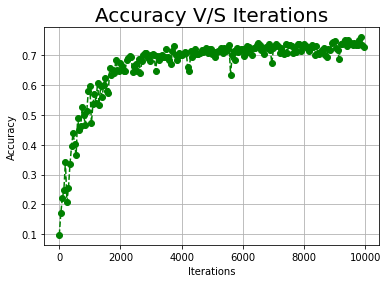

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xlayer1_hidden_units
A1 = sigmoid(Z1) #1xlayer1_hidden_units
Z2 = A1.dot(W2.T) + b2 #1Xlayer2_hidden_units
A2 = sigmoid(Z2)
Z3 = A2.dot(W.T) + b #1x10
A3 = sigmoid(Z3) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid((sigmoid((sigmoid(x_test.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 0.0702340804733271
Accuracy After completing training : 0.7271428571428571

Loss After completing testing : [[1.22820675]]
Accuracy After completing testing : 0.7116666666666667


### Learning Rate = 0.01

In [ ]:
  W2,b2,W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.01,20000,10,10)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer2 Weights : {} ".format(list(W2)))
  print("Hidden Layer2 Bias : {} ".format(list(b2)))
  print("Hidden Layer1 Weights : {} ".format(list(W1)))
  print("Hidden Layer1 Bias : {} ".format(list(b1)))

Output Layer Weights : [array([ 0.3593041 , -1.21848258,  1.82241818,  2.87651144, -3.3216912 ,
       -3.01133304, -0.16270095, -0.2607901 , -0.89871363,  2.61332354]), array([-0.77532334, -0.06879062, -1.94826079, -3.14773816, -3.30117747,
        0.14928577,  0.74701243,  2.8022539 , -2.50269464,  0.54681298]), array([ 0.36278291, -1.5445019 , -2.0043169 ,  0.1142563 ,  0.72902806,
        4.01138295, -0.1600847 , -1.69192219, -1.74237262, -0.95559403]), array([-0.2516604 ,  0.27677453, -2.13314669, -1.39289785,  0.83291427,
       -0.90694292,  0.01887879, -2.13525688,  0.59523561,  0.8551883 ]), array([-0.69054332, -1.48691802, -1.97795728, -1.1141453 ,  1.85752459,
       -1.93325257, -1.24826496,  0.18822276, -1.53435311,  0.95216501]), array([-1.37077869,  0.29614054, -2.24730983, -1.13918136,  0.96471253,
        0.83184263,  2.53021485, -2.84244658, -0.24511147, -1.04136546]), array([ 0.01955275, -0.52814459, -0.36744215, -0.59804899, -3.29465068,
        0.09298486,  0.66710

Error Every 50 Iterations : [7.53809441 6.44926586 3.29410972 4.94420182 3.23800275 4.00308829
 3.01504839 4.6415609  2.99996415 4.07964561 3.15159814 3.12768232
 3.20975865 3.96233504 2.83862107 2.7320326  3.05470026 2.677301
 2.18850827 2.12001849 2.9440628  3.15515599 3.69666895 3.44586597
 2.86283369 3.36763712 3.11450455 3.32201963 2.54607055 2.75748929
 2.79152646 3.48419378 2.56451813 2.42140653 1.95807764 2.93753639
 2.92498182 2.49894101 1.78663466 2.46021937 2.83913043 2.82443839
 2.9467438  3.55577729 1.82179756 3.08301081 2.60403333 2.89134861
 3.11156988 3.28273202 2.91507733 2.55179036 2.3153718  1.72953541
 1.65308645 2.20266459 2.31962424 1.60456143 2.87148873 3.00293603
 2.92448678 3.21649212 3.13835638 2.07548486 3.18677393 2.20226104
 3.00880759 2.30764322 4.3725931  2.51500848 2.55430656 2.29188022
 2.46880131 3.02490818 4.52288088 2.00839446 1.37988208 2.89411418
 2.69579913 2.98556045 1.94619957 2.20438757 1.39606185 1.37250511
 1.34150554 4.12808984 2.24304848 2.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

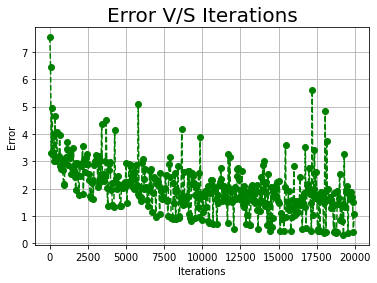

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.07785714 0.05285714 0.1        0.10071429 0.10642857 0.11
 0.14357143 0.12785714 0.15142857 0.15428571 0.145      0.15071429
 0.11285714 0.23       0.26357143 0.265      0.26142857 0.30857143
 0.24642857 0.25       0.29857143 0.24642857 0.29714286 0.21285714
 0.34928571 0.34214286 0.35428571 0.31857143 0.41357143 0.37785714
 0.41357143 0.46071429 0.45428571 0.43071429 0.45071429 0.39071429
 0.46928571 0.47       0.35428571 0.36285714 0.475      0.39285714
 0.51428571 0.505      0.47214286 0.48785714 0.49071429 0.47285714
 0.49642857 0.525      0.41571429 0.43357143 0.47785714 0.53
 0.48857143 0.50857143 0.51428571 0.505      0.51       0.515
 0.51857143 0.51785714 0.55785714 0.53285714 0.54714286 0.51857143
 0.55857143 0.56642857 0.54428571 0.55571429 0.56       0.54071429
 0.525      0.54571429 0.52428571 0.53642857 0.53785714 0.53928571
 0.52142857 0.52071429 0.53142857 0.53571429 0.55142857 0.52928571
 0.56857143 0.53357143 0.53428571 0.53857143 0.5

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

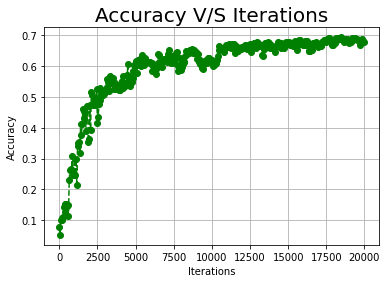

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xlayer1_hidden_units
A1 = sigmoid(Z1) #1xlayer1_hidden_units
Z2 = A1.dot(W2.T) + b2 #1Xlayer2_hidden_units
A2 = sigmoid(Z2)
Z3 = A2.dot(W.T) + b #1x10
A3 = sigmoid(Z3) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid((sigmoid((sigmoid(x_test.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 1.062727156891619
Accuracy After completing training : 0.6785714285714286

Loss After completing testing : [[1.63070348]]
Accuracy After completing testing : 0.685


### Learning Rate = 0.001

In [ ]:
  W2,b2,W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_gradient_descent(x_train,y_train,0.001,20000,10,10)

In [ ]:
  #Printing finally learned weights
  print("Output Layer Weights : {} ".format(list(W)))
  print("Output Layer Bias : {} ".format(list(b)))
  print("Hidden Layer2 Weights : {} ".format(list(W2)))
  print("Hidden Layer2 Bias : {} ".format(list(b2)))
  print("Hidden Layer1 Weights : {} ".format(list(W1)))
  print("Hidden Layer1 Bias : {} ".format(list(b1)))

Output Layer Weights : [array([ 0.05599418, -0.81623145,  1.61078048,  0.23837323, -0.90539672,
       -0.2193547 , -1.22423871, -0.57305616,  1.29904347, -0.780584  ]), array([ 1.21288803, -2.31571658, -2.20682626, -0.70807016,  1.55801644,
       -0.69389186,  0.57067535, -0.82824372, -0.57340561,  0.41822303]), array([-0.49240047,  0.65780604,  0.07962349,  1.55764855, -1.30191895,
       -1.05647584,  0.28399181, -0.78836375, -0.7139687 ,  0.58722449]), array([ 1.04741147, -0.83055769, -1.76930442, -0.03173047,  1.65694714,
       -0.2367411 , -0.29678266, -1.75232358, -1.07570053, -0.20177421]), array([ 0.77698846, -2.58821655,  0.72415278, -1.87215706, -0.31204174,
       -1.82502018,  0.48019226, -0.61159058, -0.0098174 , -0.14097224]), array([-4.50580523e-01,  9.18652842e-01, -2.11132817e-01,  2.41469537e+00,
       -5.84686663e-01, -3.39147564e-01, -3.89960749e-01, -2.41724598e-01,
       -1.33024779e+00,  9.07553299e-04]), array([-0.93074801, -1.43851825,  0.3349089 , -1.6129

Error Every 50 Iterations : [12.74734866 10.46008347  5.93385763 11.42734948  7.61227688  8.83524187
  9.97263112  8.93835072  4.08269717  6.69536126  6.46439968  5.76018374
  5.48886357  6.68975936  4.84002652  4.81389386  6.14748069  4.66304616
  3.19622368  4.27518298  4.65804356  4.51124927  4.1283066   4.37663075
  3.9065572   3.71464346  4.45179029  3.80266795  4.15918787  3.38400172
  3.66470341  2.91004733  3.28139634  3.55207244  3.93201532  3.42456187
  3.14717479  3.39433114  3.69283535  3.99283857  3.46856528  3.74591198
  3.61238427  3.26151365  3.07162392  3.85862555  3.5509174   3.74043607
  3.49554371  3.77745916  3.38645364  3.44872655  3.38810834  3.38133664
  2.95326869  3.47356912  3.11764313  3.28507664  3.85407419  3.43573672
  3.35122361  3.47548209  3.33836756  3.47539913  2.67319136  3.11201411
  3.31422058  3.4585023   3.32585971  3.43421573  3.63547553  3.3938409
  3.28657243  3.34112545  3.373297    2.9251505   3.58028522  3.35444842
  4.09905272  3.31652848

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

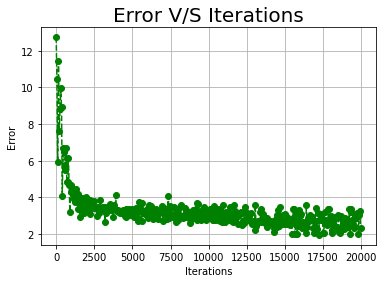

In [ ]:
#printing and plotting error every 50 iterations
error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
iterations = [50*i for i in range(len(error_every_50_iteration))]
plt.figure(1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error V/S Iterations",fontsize = 20)
plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

Accuracy Every 50 Iterations : [0.10571429 0.10571429 0.10571429 0.10571429 0.10571429 0.10571429
 0.10571429 0.10571429 0.10571429 0.10571429 0.10571429 0.10571429
 0.10642857 0.10642857 0.11357143 0.14       0.14142857 0.14142857
 0.14214286 0.13714286 0.12357143 0.11857143 0.11785714 0.11714286
 0.10928571 0.10785714 0.105      0.10214286 0.08928571 0.07714286
 0.07071429 0.06928571 0.06285714 0.06214286 0.065      0.06214286
 0.065      0.06071429 0.06071429 0.05857143 0.05142857 0.10428571
 0.11214286 0.05928571 0.07714286 0.13571429 0.13785714 0.13571429
 0.135      0.13571429 0.13571429 0.13428571 0.135      0.13428571
 0.13428571 0.13428571 0.13571429 0.13928571 0.13642857 0.13928571
 0.13857143 0.13928571 0.13928571 0.13857143 0.14071429 0.14
 0.14142857 0.14       0.13642857 0.13785714 0.13714286 0.13642857
 0.13714286 0.13571429 0.13714286 0.13785714 0.14142857 0.14071429
 0.14       0.14       0.14071429 0.14142857 0.14214286 0.14214286
 0.14214286 0.14142857 0.14642857 0.1

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy V/S Iterations')

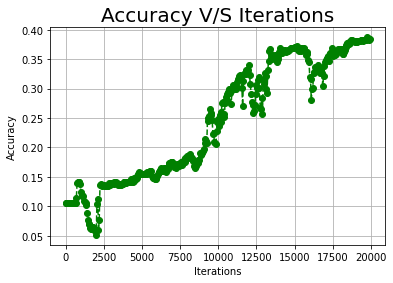

In [ ]:
# printing and plotting accuracy every 50 iterations
accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
plt.figure(2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy V/S Iterations",fontsize = 20)
plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
plt.grid(True)
plt.show()

In [ ]:
#---------------------------------------------printing training evaluation metrics----------------------------------------------------
#print(y_train)
#print(y_trian_pred)
print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
print("")

#---------------------------------------------printing testing evaluation metrics------------------------------------------------------
one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
one_hot_y_test[np.arange(y_test.size),y_test]=1
one_hot_y_test = one_hot_y_test[:,1:]

#printing loss after testing
Xp = list()
Yp = list()
random_no = random.randint(0,x_test.shape[0]-1)
Xp.append(x_test[random_no])
Yp.append(one_hot_y_test[random_no])
Xp = np.array(Xp) #1x6
Yp = np.array(Yp) #1x10

Z1 = Xp.dot(W1.T) + b1 #1xlayer1_hidden_units
A1 = sigmoid(Z1) #1xlayer1_hidden_units
Z2 = A1.dot(W2.T) + b2 #1Xlayer2_hidden_units
A2 = sigmoid(Z2)
Z3 = A2.dot(W.T) + b #1x10
A3 = sigmoid(Z3) #1x10
print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))))

#printing loss after testing
pred_one_hot_y_test = sigmoid((sigmoid((sigmoid(x_test.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
y_test_pred = list()
for row in range(pred_one_hot_y_test.shape[0]):
  threshold=0
  highest_column = 0
  for column in range(pred_one_hot_y_test.shape[1]):
    if(pred_one_hot_y_test[row][column] > threshold):
      threshold = pred_one_hot_y_test[row][column]
      highest_column = column
  y_test_pred.append(highest_column + 1)

correctly_classified = 0
for n in range(len(y_test)):
  if y_test_pred[n] == y_test[n]:
    correctly_classified = correctly_classified + 1
accuracy_test = correctly_classified / len(y_test)

#print(list(y_test))
#print(y_test_pred)
print("Accuracy After completing testing : {}".format(accuracy_test))

Loss After completing training : 2.3257471246408192
Accuracy After completing training : 0.385

Loss After completing testing : [[2.82925225]]
Accuracy After completing testing : 0.365


# **Using Pytorch Library**

In [ ]:
# Import dependencies
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Dataset



tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


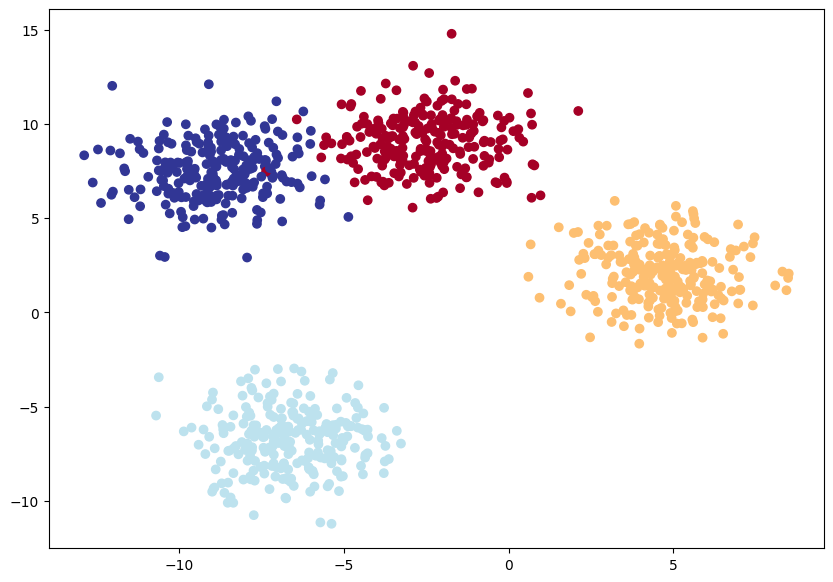

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data using make_blobs() function, you can create however many classes using the centers parameter in this function
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

## Modelling

In [ ]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

## Training

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

## Inference

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

Alright, looks like our model's predictions are still in logit form.

Though to evaluate them, they'll have to be in the same form as our labels (`y_blob_test`) which are in integer form.

Let's convert our model's prediction logits to prediction probabilities (using `torch.softmax()`) then to prediction labels (by taking the `argmax()` of each sample).

> **Note:** It's possible to skip the `torch.softmax()` function and go straight from `predicted logits -> predicted labels` by calling `torch.argmax()` directly on the logits.
>
> For example, `y_preds = torch.argmax(y_logits, dim=1)`, this saves a computation step (no `torch.softmax()`) but results in no prediction probabilities being available to use.

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Nice! Our model predictions are now in the same form as our test labels.

Let's visualize them with `plot_decision_boundary()`, remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (`plot_decision_boundary()` does this automatically for us).

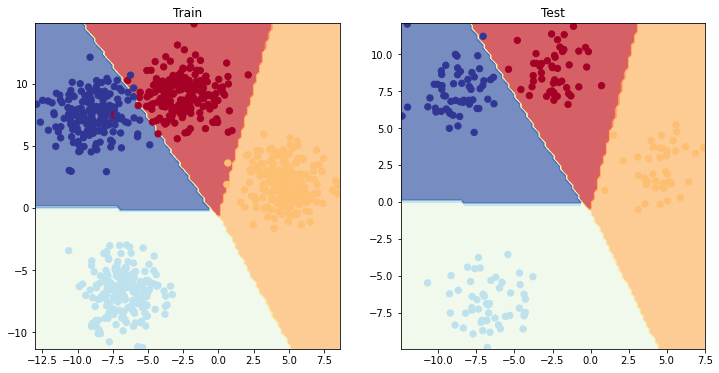

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)